# Predicting Water Potability with ML

This notebook will use various Python-based machine learning and data science libraries in an attempt to build a machine learning model. The goal of the model is to be capable of predicting whether or not a water sample is safe for human consumption based on a number of attributes of the water's source.

## 1. Problem Definition

> Given a set of attributes of a water source obtained by a sample, predict if that water source provides safe, potable water.

## 2. Data

The data for this project was obtained on Kaggle: https://www.kaggle.com/adityakadiwal/water-potability

m: parts per million
μg/L: microgram per litre
mg/L: milligram per litre

Column description:

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

## 3. Evaluation

> Attempt to acheive a model that predicts with an F1 Score of >80% the potability of a water source.
F1-Score is a harmonic average (max value is the arithmetic mean) of the precision and recall score.

## 4. Features

**Water Potability Data Dictionary**
The following are the features we'll use to predict our target variable, potability.

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Prepare the tools
Using pandas, Matplotlib, and Numpy for data analysis and manipulation.

In [3]:
# Import all of the tools needed

# Regular EDA (exploration data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.simplefilter("ignore")

## Load Data

In [4]:
# use pandas to load data into a DataFrame
df = pd.read_csv("water_potability.csv")
df.shape # (rows, columns)

(3276, 10)

### Exploratory Data Analysis (EDA)

Learn more about the data set.

What kind of data is in the set?

Is there missing data to deal with?

Are there any outliers?


In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [7]:
# Potability is the target variable, how many of each class are there?
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

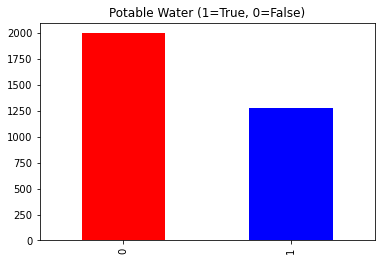

In [8]:
df["Potability"].value_counts().plot(kind="bar", color=["red", "blue"], title = "Potable Water (1=True, 0=False)");

In [9]:
(1998/(1998+1278))*100

60.98901098901099

Target classes are a 60/40 split, negative to positive (non-potable to potable).

In [10]:
1998-1278

720

#### Target variable class imbalance
For the purpose of this analysis, move forward with building the ML model with the data as is.

The imbalance in target classes may need to be addressed with one of various techniques (see link for reference: https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0)
This will be addressed in the next iteration of this project.

Use F1 score, Precision and Recall as metrics.
With more experience revist this project and improve by dealing with the imbalance issue.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [13]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### Missing values will be handled after splitting the data set

### Use a Seaborn boxplot to visulize the distributions for the Potability classes

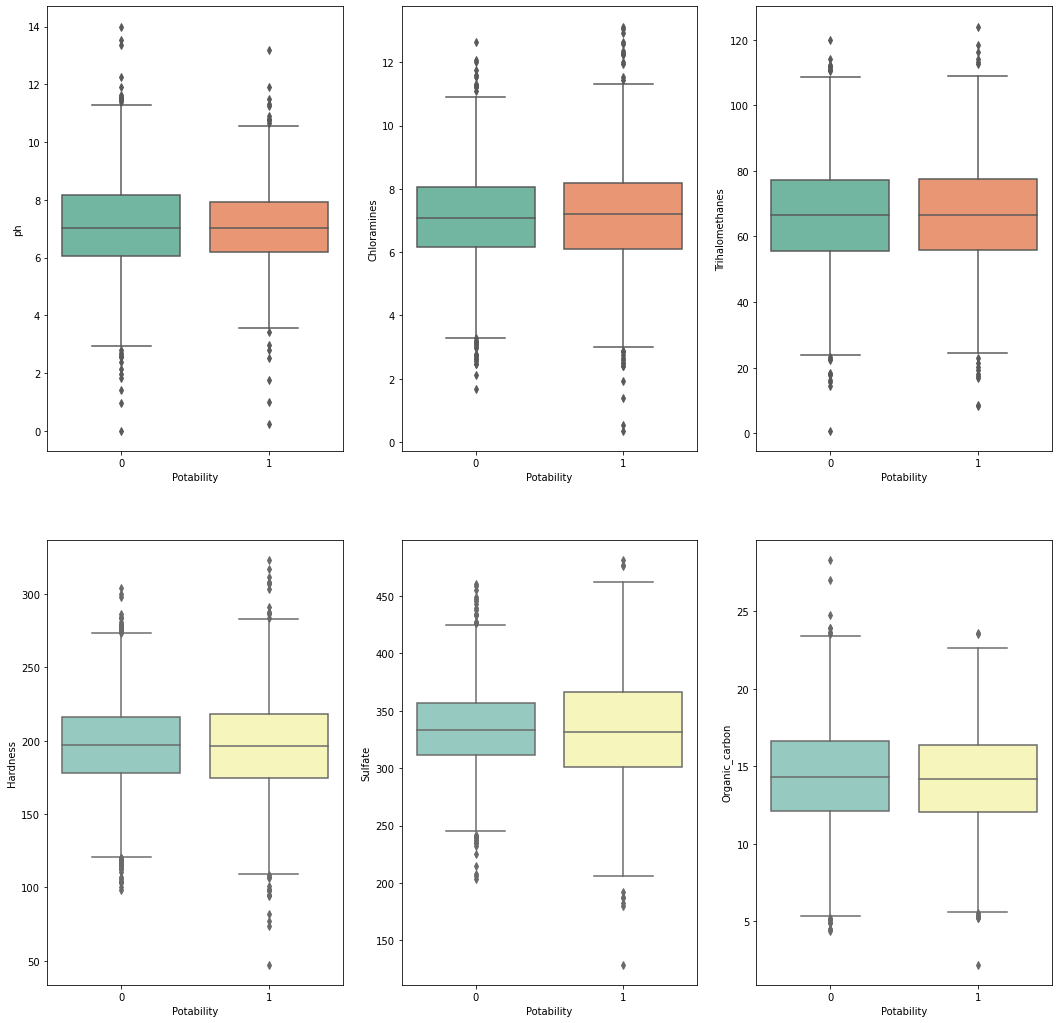

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 18))
sns.boxplot(ax=axes[0,0], data=df, palette="Set2", x='Potability', y='ph')
sns.boxplot(ax=axes[0,1], data=df, palette="Set2", x='Potability', y='Chloramines')
sns.boxplot(ax=axes[0,2], data=df, palette="Set2", x='Potability', y='Trihalomethanes')
sns.boxplot(ax=axes[1,0], data=df, palette="Set3", x='Potability', y='Hardness')
sns.boxplot(ax=axes[1,1], data=df, palette="Set3", x='Potability', y='Sulfate')
sns.boxplot(ax=axes[1,2], data=df, palette="Set3", x='Potability', y='Organic_carbon');

### Look at the overall distribution of the features with histograms

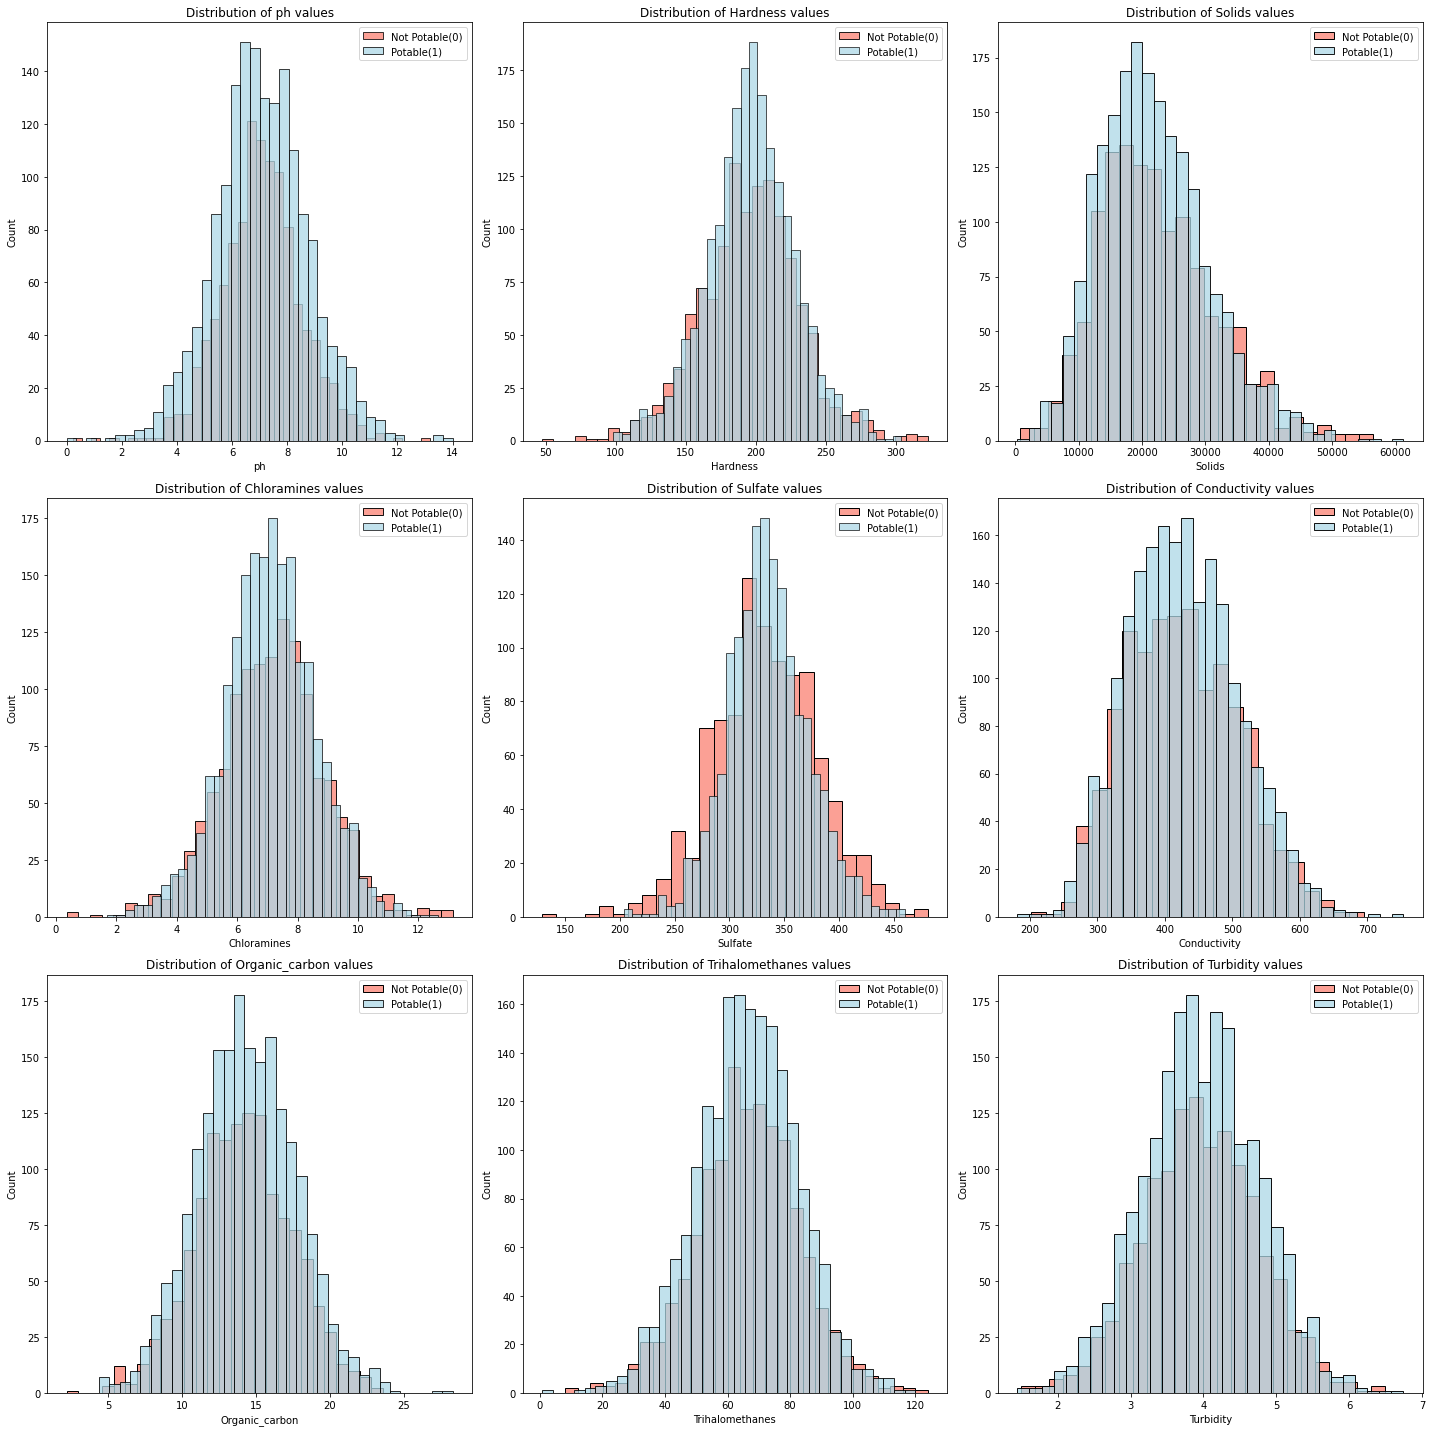

In [16]:
# Distribution of features
potable = df.query('Potability == 0')
not_potable = df.query('Potability == 1')

fig = plt.figure(figsize=(20,20))

for ax,column in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(f'Distribution of {column} values')
    sns.histplot(x=not_potable[column],label='Not Potable(0)', color="salmon")
    sns.histplot(x=potable[column],label='Potable(1)', color="lightblue")
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()

### Produce a correlation matrix to visualize data correlation

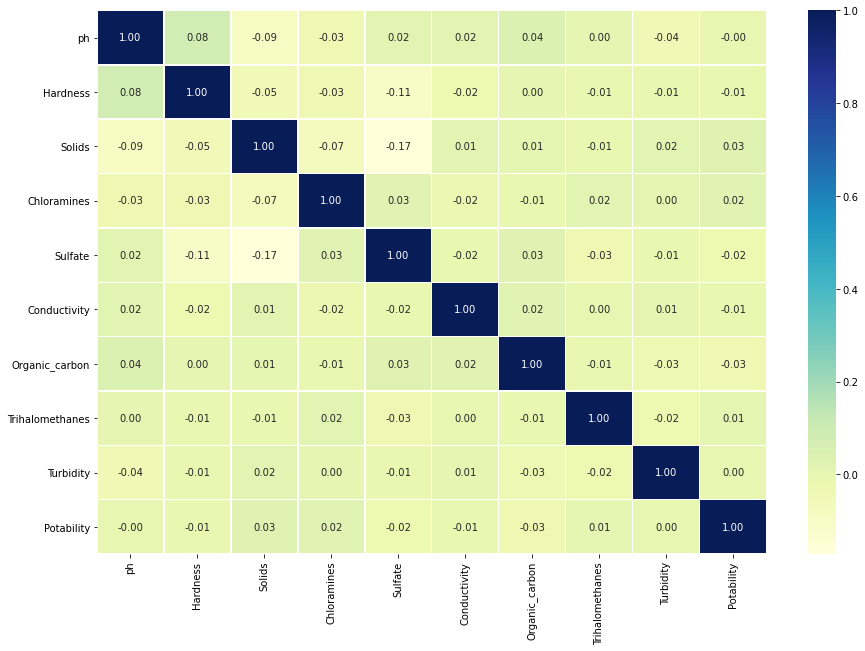

In [17]:
# Use Seaborn to make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

### Little to no correlation present in the dataset

## Modeling

* Create a working copy of the dataset
* Data set needs to be split into training and test sets.
* After splitting, complete imputation.


In [18]:
# Create workign copy of dataset
df_work = df.copy()

In [19]:
# Split data into X & y

X = df_work.drop("Potability", axis=1)
y = df_work.Potability

In [20]:
# Split data into train and test sets
np.random.seed(19)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
172,NaN,237.677383,26009.075259,7.074531,372.600296,344.767924,14.442238,72.696240,3.706602
1797,6.157443,155.835706,25937.711438,8.163144,298.192406,533.288351,14.356496,68.120761,4.770154
2762,6.100245,160.608230,13886.809713,7.542775,366.688795,449.948287,18.722860,64.390521,2.174898
570,7.785107,174.889361,13404.254332,7.517806,NaN,491.431722,13.825548,75.059426,4.904613
1617,6.957434,214.380139,15007.421534,6.997160,328.818760,468.555062,17.407261,104.207104,4.892050
...,...,...,...,...,...,...,...,...,...
936,5.746529,183.471794,35633.268511,6.066386,327.557850,354.174437,12.548871,70.525972,3.808372
1378,7.499844,210.985034,23707.465304,7.148518,NaN,484.843340,18.081957,52.967469,4.454477
757,8.370440,231.442553,15063.814968,12.279374,NaN,422.293819,15.027088,67.503004,3.210635
2670,10.600590,274.968783,21558.308741,6.112819,350.363703,331.120496,12.610799,NaN,5.477700


#### Check missing values in the training set

In [22]:
y_train.isna().sum()

0

In [23]:
X_train.isna().sum()

ph                 395
Hardness             0
Solids               0
Chloramines          0
Sulfate            624
Conductivity         0
Organic_carbon       0
Trihalomethanes    127
Turbidity            0
dtype: int64

#### Impute the missing values for ph, sulfate and trihalomethanes in the training set with median values

In [24]:
pd.options.mode.chained_assignment = None  # default='warn'

X_train['ph'] = X_train['ph'].fillna(X_train['ph'].median())
X_train['Sulfate'] = X_train['Sulfate'].fillna(X_train['Sulfate'].median())
X_train['Trihalomethanes'] = X_train['Trihalomethanes'].fillna(X_train['Trihalomethanes'].median())

In [25]:
X_train.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

#### Check missing values in the Test set

In [26]:
X_test.isna().sum()

ph                  96
Hardness             0
Solids               0
Chloramines          0
Sulfate            157
Conductivity         0
Organic_carbon       0
Trihalomethanes     35
Turbidity            0
dtype: int64

#### Impute the missing values for ph, sulfate and trihalomethanes in the test set with median values

In [27]:
X_test['ph'] = X_test['ph'].fillna(X_test['ph'].median())
X_test['Sulfate'] = X_test['Sulfate'].fillna(X_test['Sulfate'].median())
X_test['Trihalomethanes'] = X_test['Trihalomethanes'].fillna(X_test['Trihalomethanes'].median())

In [28]:
X_test.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

### Data has been split into training and test sets and missing values have been filled

Select the machine learning models to use.  The models will then be trained on the training set and tested on the test set.

Working with four machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors
3. RandomForestClassifier
4. CatBoostClassifier

In [40]:
# Put the models into a dictionary

models = {"Logistic Regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "CatBoost": CatBoostClassifier()}

# Write a function that will fit these models to the training data and then provide a score when evaluated against the test data

def fit_eval(models, X_train, X_test, y_train, y_test):
    """
    Function will fit and evaluate the given machine learning models.  models is a dictionary of previously imported machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    # Set a random seed
    np.random.seed(19)
    
    # Create an empty dictionary to store each model's score
    model_scores = {}
    
    # Loop through the models to fit and then score
    for name, model in models.items():
        # data fitting
        model.fit(X_train, y_train);
        # evaluate the model and place score in model_scores dictionary
        model_scores[name] = model.score(X_test,y_test);
    return model_scores;

In [ ]:
model_scores = fit_eval(models = models,
                      X_train = X_train,
                      X_test = X_test,
                      y_train = y_train,
                      y_test = y_test);

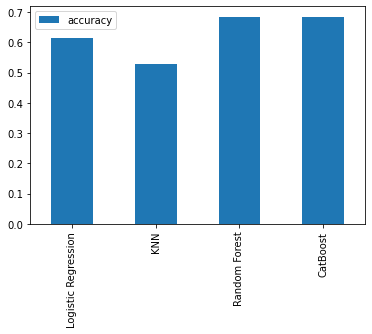

In [42]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

#### Due to imbalnce in the data, accuracy isn't the best evaluation metric.

In the next steps work model hyperparameter tuning and review additional metrics.

The KNeighborsClassifier will no longer be considered.

### Hyperprameter Tuning

Using RandomizeSearchCV with:
1. LogisticRegression()
2. RandomForestClassifier()
3. CatBoostClassifier()

**Create hyperparameter grids for the remaining 3 models**

In [43]:
# Create a hyperparameter grid for LogisticRegression
lr_grid = {"C":np.logspace(-2, 2, 20),
               "solver":["liblinear"]}  

# Create a hyperparmeter grid for RandomForestClassifier
rf_grid = {"n_estimators": [100, 200, 300, 500],
          "max_depth": [5, 10, 12],
          "max_features": ['auto', 'sqrt', 'log2'],
          "min_samples_split": np.arange(10, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

# Create a hyperparmeter grid for CatBoostClassifier
cb_grid = {"depth": [8],
          "learning_rate": np.linspace(0,0.2,5)}

#### Tune the LogisticRegression Model

In [44]:
np.random.seed(19)

# Setup a random hyperparameter search
rs_lr = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = lr_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit the random hyperparameter search model for LogisticRegression
rs_lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [45]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.01}

In [46]:
rs_lr.score(X_test,y_test)

0.614329268292683

#### Tune the RandomForestClassifier Model

In [47]:
np.random.seed(19)

# Setup a random hyperparameter search
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions = rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

# Fit the random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [5, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([10, 12, 14, 16, 18]),
                                        'n_estimators': [100, 200, 300, 500]},
                   verbose=True)

In [48]:
rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 12}

In [49]:
rs_rf.score(X_test, y_test)

0.6859756097560976

#### Tune the Catboost Model

In [ ]:
np.random.seed(19)

# Setup a random hyperparameter search
rs_cb = RandomizedSearchCV(CatBoostClassifier(),
                         param_distributions = cb_grid,
                         cv=5,
                         n_iter=20,
                         verbose=False);

# Fit the random hyperparameter search model for CatBoostClassifier
rs_cb.fit(X_train, y_train);

In [51]:
rs_cb.best_params_

{'learning_rate': 0.05, 'depth': 8}

In [62]:
rs_cb.score(X_test, y_test)

0.6615853658536586

### Hyperparameter Tuning using GridSearchCV

The RandomForestClassifier model has the best results so far, move forward with it.

In [60]:
# Different hyperparams for our RandomForestClassifier
rf_grid = {"n_estimators": [200, 600, 800],
          "max_depth": [12, 14],
          "min_samples_split": [16],
          "min_samples_leaf": [1]}

# Setup the Grid hyperparam search
gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid = rf_grid,
                    cv=5,
                    verbose=False)

# Fit the grid hyperparameter search model
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12, 14], 'min_samples_leaf': [1],
                         'min_samples_split': [16],
                         'n_estimators': [200, 600, 800]},
             verbose=False)

In [54]:
gs_rf.best_params_

{'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 600}

In [55]:
gs_rf.score(X_test, y_test)

0.6890243902439024

#### Evaluate the RandomForestClassifier Model with additional evaluation metrics

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

In [56]:
# Make predictions with the tuned RandomForestClassifier model
y_preds = gs_rf.predict(X_test)

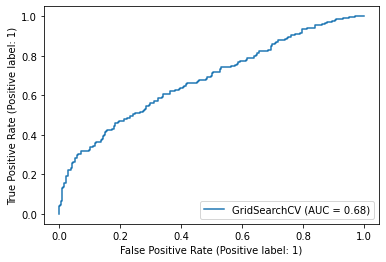

In [57]:
# Plot ROC curve and calculate the AUC metric
plot_roc_curve(gs_rf, X_test, y_test);

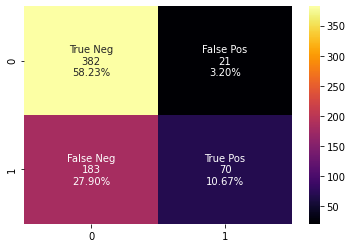

In [58]:
# Plot a confusion matrix with labels showing the models weaknesses

cf_matrix = confusion_matrix(y_test, y_preds)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='inferno');

#### Produce a Classification Report, a cross-validated precision, recall and F1 score.

In [59]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.95      0.79       403
           1       0.77      0.28      0.41       253

    accuracy                           0.69       656
   macro avg       0.72      0.61      0.60       656
weighted avg       0.71      0.69      0.64       656



**These are the values based on a single test split**
It would be better to use cross-validation

#### Calculate the evaluation metrics using cross-validation

Calculate precision, recall and F1 score of the model using cross-validation with `cross_val_score` 

In [49]:
# Check best hyperparamers
gs_rf.best_params_

{'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 600}

In [50]:
# Create the RandomForestClassifier using the best parameters
classifier = RandomForestClassifier(max_depth=14,
                                   min_samples_leaf=1,
                                   min_samples_split = 16,
                                   n_estimators = 600)

In [73]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, min_samples_split=16, n_estimators=600)

In [74]:
classifier.score(X_test, y_test)

0.6859756097560976

In [75]:
X_full = np.concatenate((X_train, X_test), axis= 0)
X_full.shape

(3276, 9)

In [76]:
y_full = np.concatenate((y_train, y_test), axis= 0)
y_full.shape

(3276,)

In [77]:
# Cross-validated accuracy
cv_acc = cross_val_score(classifier, X_full, y_full, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.6733815862967789

In [67]:
# Cross-validated precision
cv_precision = cross_val_score(classifier, X_full, y_full, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.6999941262343804

In [69]:
# Cross-validated recall
cv_recall = cross_val_score(classifier, X_full, y_full, cv=5,  scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.2801164215686275

In [70]:
# Cross-validated f1-score
cv_f1 = cross_val_score(classifier, X_full, y_full, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.3866492182304511

In [88]:
data = {'Accuracy': [cv_acc], 'Precision': [cv_precision], 'Recall': [cv_recall], 'F1': [cv_f1]}
model_scores = pd.DataFrame(data = data, index=None)
model_scores

,Accuracy,Precision,Recall,F1
0,0.673382,0.699994,0.280116,0.386649


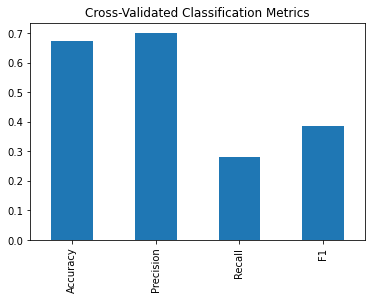

In [72]:
# Visulize the cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title = "Cross-Validated Classification Metrics",
                     legend = False);

### Feature Importance

"Which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model.

In [89]:
# Fit an instance of RandomForestClassifier
classifier = RandomForestClassifier(max_depth=14,
                                   min_samples_leaf=1,
                                   min_samples_split = 16,
                                   n_estimators = 600)

classifier.fit(X_train, y_train);

In [91]:
classifier.feature_importances_

array([0.1520518 , 0.12281896, 0.11293139, 0.11799184, 0.15936488,
       0.08536975, 0.08252521, 0.08418771, 0.08275846])

In [92]:
# PLot the feature importances

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

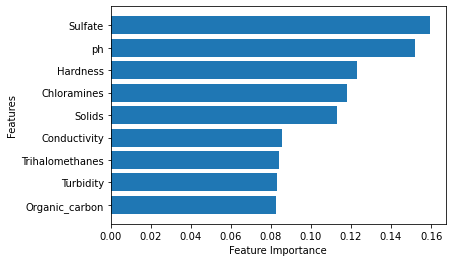

In [93]:
plot_features(X_train.columns, classifier.feature_importances_)

#### Sulfate

Sulfate has the highest Feature Importance and is also the feature with the most missing values in the data set.  Approximately 24% of the total samples were missing a value for sulfate content and therfore were filled with the median value of the train and test datasets respectively.  
This can be noted as an area of improvement in future sampling programs as more accurate sulfate data will undoubtedly improve the model's ability to make better predictions. 

### Discussion

As can be noted from the confusion matrix and the graph above, this model is weak on Recall.  This is to say that it predicts many false negatives.  In the context of this problem, many of the water samples that were in fact potable were predicted to be non-potable by the model.  On the other hand the model's precision score is relatively high due to low number of false positives given. False positives would be the samples the model predicted to be potable that were in fact non-potable.

The target value imbalance in the dataset of 60%/40% non-potable to potable samples may have had an adverse impact on the models ability to improve.  Another potential area of improvement could be how the missing sulfate data is handled.  A simple replacement with the median may not be the best solution based on sulfate importance.

**Next steps.**
Work the problem with this dataset again, this time addressing the target value imbalance.  Research recommended ways of handling an imbalance such as this for a binary classification problem.